In [64]:
## Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Importing data
pd.set_option('display.max_columns',31)
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


## EDA

In [66]:
df.shape

(517, 31)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [68]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [69]:
df.duplicated().sum()

8

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df.duplicated().sum()

0

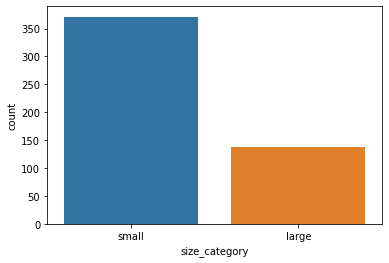

In [72]:
sns.countplot(df['size_category'])
plt.show()

<AxesSubplot:>

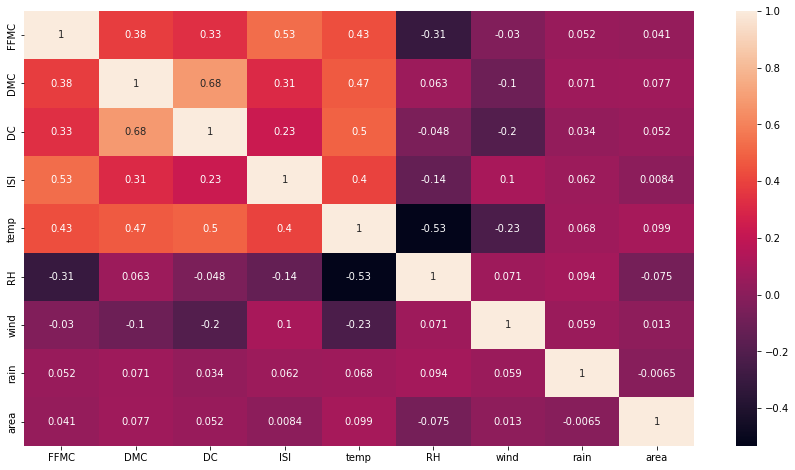

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap((df.iloc[:,2:11]).corr(),annot=True)

In [74]:
x=df.iloc[:,2:30]
y=df.iloc[:,-1]

In [75]:
sc=StandardScaler()
sc.fit_transform(x)


array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

## Model Building

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [77]:
def predict(model):
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    trainac = model.score(xtrain,ytrain)
    testac  =model.score(xtest,ytest)
  
    print(f"Training Accuracy {trainac}\nTesting Accuracy {testac}")
    print("Classification Report :", classification_report(ytest,y_pred))

## Kernal=linear

In [78]:
predict(SVC(kernel='linear',random_state=1))

Training Accuracy 1.0
Testing Accuracy 0.9609375
Classification Report :               precision    recall  f1-score   support

       large       0.97      0.88      0.92        33
       small       0.96      0.99      0.97        95

    accuracy                           0.96       128
   macro avg       0.96      0.93      0.95       128
weighted avg       0.96      0.96      0.96       128



## Kernal = polynomial

In [79]:
predict(SVC(kernel='poly',random_state=1))

Training Accuracy 0.7664041994750657
Testing Accuracy 0.7890625
Classification Report :               precision    recall  f1-score   support

       large       1.00      0.18      0.31        33
       small       0.78      1.00      0.88        95

    accuracy                           0.79       128
   macro avg       0.89      0.59      0.59       128
weighted avg       0.84      0.79      0.73       128



##  Kernal = RBF

In [80]:
predict(SVC(kernel='rbf',gamma=0.2,random_state=1))

Training Accuracy 1.0
Testing Accuracy 0.75
Classification Report :               precision    recall  f1-score   support

       large       1.00      0.03      0.06        33
       small       0.75      1.00      0.86        95

    accuracy                           0.75       128
   macro avg       0.87      0.52      0.46       128
weighted avg       0.81      0.75      0.65       128

